# Minicurso Python - SEMMAP 5

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Mais sobre gráficos...

In [106]:
plt.style.available

['seaborn-white',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-talk',
 'seaborn-pastel',
 'bmh',
 'seaborn-dark',
 'ggplot',
 'seaborn-muted',
 '_classic_test',
 'seaborn-deep',
 'seaborn-dark-palette',
 'fast',
 'seaborn-whitegrid',
 'dark_background',
 'grayscale',
 'seaborn-ticks',
 'classic',
 'Solarize_Light2',
 'fivethirtyeight',
 'seaborn',
 'seaborn-bright',
 'seaborn-paper',
 'seaborn-poster',
 'tableau-colorblind10',
 'seaborn-colorblind']

In [108]:
plt.style.use('seaborn-colorblind')

# Pandas

## Series

In [38]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [43]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=['a', 'b', 'c', 'd', 'e', 'f'])
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

Podemos usar como um vetor

In [44]:
s[0]

1.0

Mas os índices podem ajudar

In [46]:
s.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')


Com .loc acessamos uma linha do índice com base no nome. Então:
```
1. series.loc[objeto_python] - valor com o devido nome.
2. series.iloc[int] - i-ésimo elemento da Series.
```

In [42]:
s.loc['a']

1.0

In [47]:
s.iloc[0]

1.0

## Dataframe

Ao combinar várias Series com um índice comum, criamos um DataFrame
Basicamente uma tabela!

Não é tão comum gerar eles mão como estamos fazendo, geralmente carregamos DataFrames de arquivos .csv, .json ou até de sistemas de bancos de dados mariadb. De qualquer forma, use os exemplos abaixo para entender a estrutura de um dataframe.

Lembre-se que {}/dict é um dicionário (ou mapa) em Python. Podemos criar uma série a partir de um dicionário index->value

In [49]:
area_dict = {'California': 423967,
             'Texas': 695662,
             'New York': 141297,
             'Florida': 170312,
             'Illinois': 149995}

In [50]:
list(area_dict.keys())

['California', 'Texas', 'New York', 'Florida', 'Illinois']

In [51]:
list(area_dict.values())


[423967, 695662, 141297, 170312, 149995]

In [58]:
area_dict['California']


423967

Podemos criar a série a partir do dicionário, cada chave vira um elemento do índice. Os valores viram os dados do vetor.



In [60]:
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Agora, vamos criar outro dicionário com a população dos estados.



In [62]:
pop_dict = {'California': 38332521,
            'Texas': 26448193,
            'New York': 19651127,
            'Florida': 19552860,
            'Illinois': 12882135}
pop = pd.Series(pop_dict)
pop

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Por fim, observe que o DataFrame é uma combinação de Series. Cada uma das Series vira uma coluna da tabela de dados.



In [109]:
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [121]:
data["area"] > 200000

California     True
Texas          True
New York      False
Florida       False
Illinois      False
Name: area, dtype: bool

In [122]:
(data["area"] > 200000).values

array([ True,  True, False, False, False])

In [123]:
data[(data["area"] > 200000).values]

,area,pop
California,423967,38332521
Texas,695662,26448193


Agora o use de .loc e .iloc deve ficar mais claro, observe os exemplos abaixo.



In [69]:
data.loc[['California', 'Texas']]

,area,pop
California,423967,38332521
Texas,695662,26448193


Note que o uso de iloc retorna a i-ésima linha. O problema é que nem sempre nos dataframes esta ordem vai fazer sentido. O iloc acaba sendo mais interessante para iteração (e.g., passar por todas as linhas.)



In [71]:
data.iloc[0]

area      423967
pop     38332521
Name: California, dtype: int64

## Slicing

Podemos realizar o slicing usando o .iloc.



In [74]:
data.iloc[2:4]

,area,pop
New York,141297,19651127
Florida,170312,19552860


## Modificando DataFrames

Series e DataFrames são objetos mutáveis em Python. Podemos adicionar novas colunas em DataFrama facilmente da mesma forma que adicionamos novos valores em um mapa. Por fim, podemos também mudar o valor de linhas específicas e adicionar novas linhas.

In [77]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


## Arquivos

In [31]:
!wget -nc https://media.githubusercontent.com/media/icd-ufmg/2019.1/master/aulas/04-EDA-e-Vis/baby.csv

--2019-09-26 18:25:32--  https://media.githubusercontent.com/media/icd-ufmg/2019.1/master/aulas/04-EDA-e-Vis/baby.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154696208 (148M) [text/plain]
Saving to: ‘baby.csv’

baby.csv            100%[===================>] 147,53M  4,37MB/s    in 34s     

2019-09-26 18:26:06 (4,35 MB/s) - ‘baby.csv’ saved [154696208/154696208]



In [82]:
df = pd.read_csv("baby.csv", index_col=0)
df.head(5)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Name,Year,Gender,State,Count
Id,,,,,
1,Mary,1910,F,AK,14
2,Annie,1910,F,AK,12
3,Anna,1910,F,AK,10
4,Margaret,1910,F,AK,8
5,Helen,1910,F,AK,7


In [83]:
df[10:15]

,Name,Year,Gender,State,Count
Id,,,,,
11,Ruth,1911,F,AK,7
12,Annie,1911,F,AK,6
13,Elizabeth,1911,F,AK,6
14,Helen,1911,F,AK,6
15,Mary,1912,F,AK,9


In [84]:
df[['Name', 'Gender']].head(6)

,Name,Gender
Id,,
1,Mary,F
2,Annie,F
3,Anna,F
4,Margaret,F
5,Helen,F
6,Elsie,F


## Groupby

A ideia é separar os dados com base em valores comuns, ou seja, agrupar por nomes e realizar alguma operação

In [88]:
gb = df.groupby('Name')
gb.mean()

,Year,Count
Name,,
Aaban,2013.500000,6.000000
Aadan,2009.750000,5.750000
Aadarsh,2009.000000,5.000000
Aaden,2010.015306,17.479592
Aadhav,2014.000000,6.000000
...,...,...
Zyrah,2012.000000,5.500000
Zyren,2013.000000,6.000000
Zyria,2006.714286,5.785714


Não faz tanto sentido somar o ano, embora seja um número aqui representa uma categoria. Vamos somar as contagens apenas.



In [87]:
gb.sum()['Count'].sort_values()[::-1]

Name
James       4957166
John        4845414
Robert      4725713
Michael     4312975
William     3839236
             ...   
Makua             5
Makinlee          5
Makenlie          5
Makenlee          5
Zyshonne          5
Name: Count, Length: 30274, dtype: int64

In [89]:
df.groupby(['Name', 'Year']).sum()

Count
Name     Year       
Aaban    2013      6
         2014      6
Aadan    2008     12
         2009      6
         2014      5
...              ...
Zyriah   2011      6
         2012      5
         2013      7
         2014      6
Zyshonne 1998      5

[548154 rows x 1 columns]

## Explorando os dados !

In [139]:
df[["Year", "Name"]]

,Year,Name
Id,,
1,1910,Mary
2,1910,Annie
3,1910,Anna
4,1910,Margaret
5,1910,Helen
...,...,...
5647422,2014,Seth
5647423,2014,Spencer
5647424,2014,Tyce


In [138]:
series = df[["Year", "Count"]].groupby("Year").sum()
series

,Count
Year,
1910,516318
1911,565810
1912,887984
1913,1028553
1914,1293322
...,...
2010,3116548
2011,3079145
2012,3073858


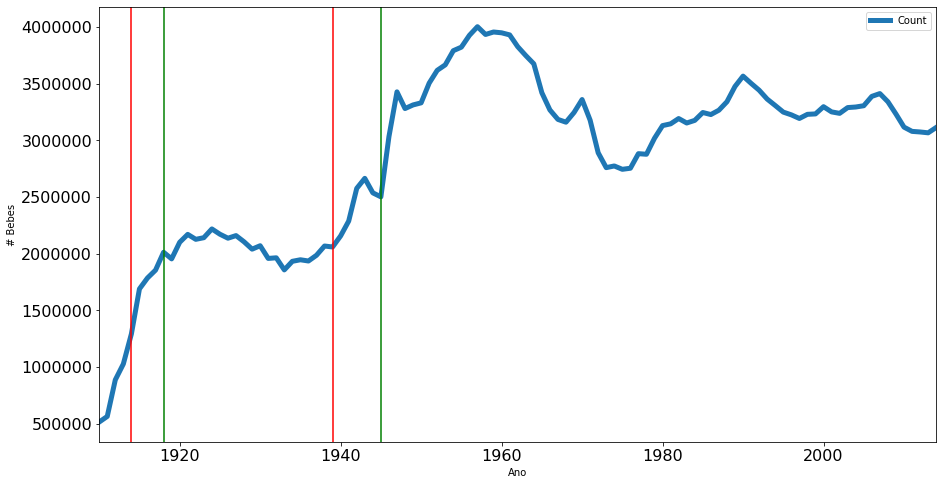

In [105]:
series.plot(figsize=(15, 8), fontsize=16, lw=5)

plt.xlabel('Ano')
plt.ylabel('# Bebes')

plt.axvline(x=1914, color='red')
plt.axvline(x=1918, color='green')

plt.axvline(x=1939, color='red')
plt.axvline(x=1945, color='green')

# Guerra Mundial (1914-1918)
# Segunda Guerra Mundial (1939-1945)

In [178]:
new_df = df[["Name", "Count"]].groupby('Name').sum().sort_values(by='Count')[::-1][0:100]
new_df

,Count
Name,
James,4957166
John,4845414
Robert,4725713
Michael,4312975
William,3839236
...,...
Christine,574500
Walter,559013
Peter,555737


In [188]:
# names = ['Douglas', 'Brenda', 'Amanda', "James"]
names = ['Douglas', 'Brenda', 'Amanda']
names

['Douglas', 'Brenda', 'Amanda']

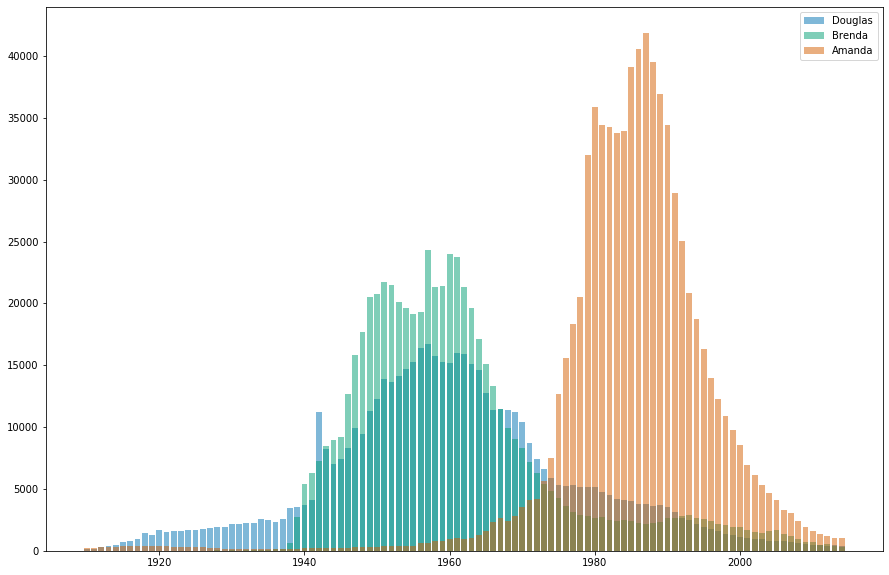

In [189]:
plt.figure(figsize=[15, 10])
for baby in names:
    lines = df[df["Name"] == baby][["Year", "Count"]]
    years = {}
    for line in lines.values:
        y = line[0]
        c = line[1]
        if y in years:
            years[y] += c
        else:
            years[y] = c

    plt.bar(years.keys(), years.values(), label=baby, alpha=0.5)

plt.legend()
plt.show()